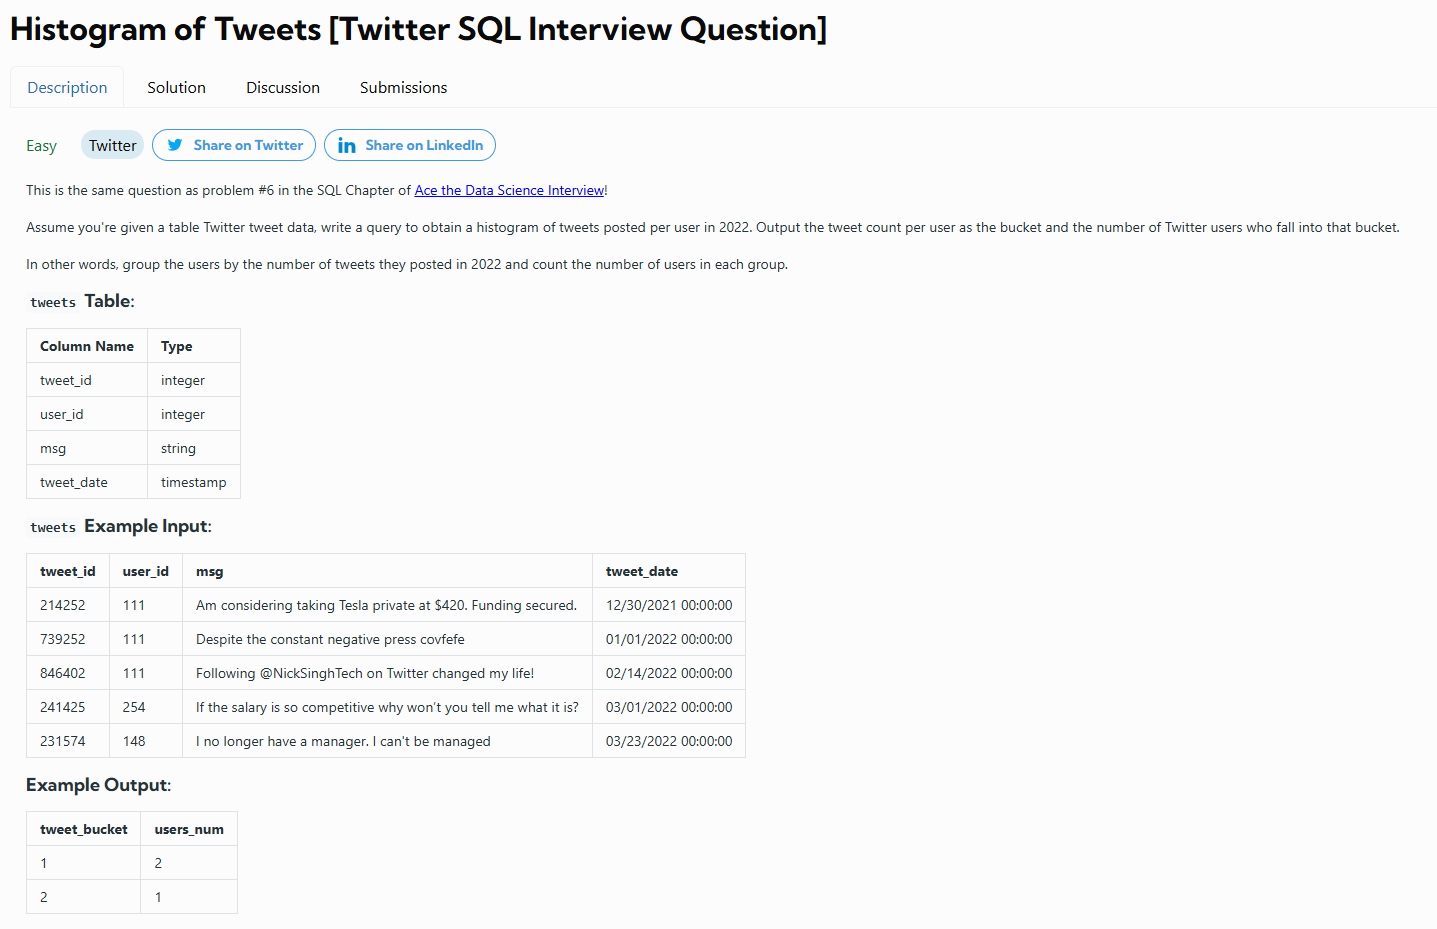

In [ ]:
SELECT tweet_bucket, COUNT(*) as users_num
FROM  (SELECT user_id, COUNT(*) as tweet_bucket
  FROM tweets
  WHERE tweet_date BETWEEN '01/01/2022' AND '12/31/2022'
  GROUP BY user_id) as tweets_count
GROUP BY tweet_bucket

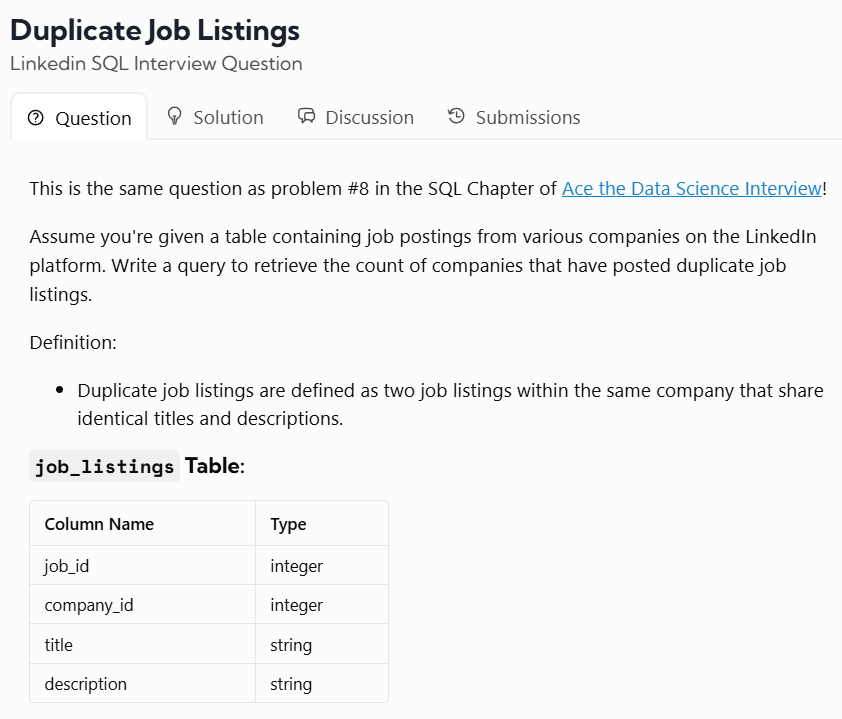

In [ ]:
# My code
with cte as (SELECT company_id, title, description, count(*) as job_count 
FROM job_listings 
GROUP BY company_id, title, description)

-- SELECT * from cte;
select company_id from cte 
where job_count > 1;

# correct code
select company_id, lower(title), lower(description), count(DISTINCT job_id) as num_dup
from job_listings
GROUP BY company_id, lower(title), lower(description)
having count(DISTINCT job_id) > 1;

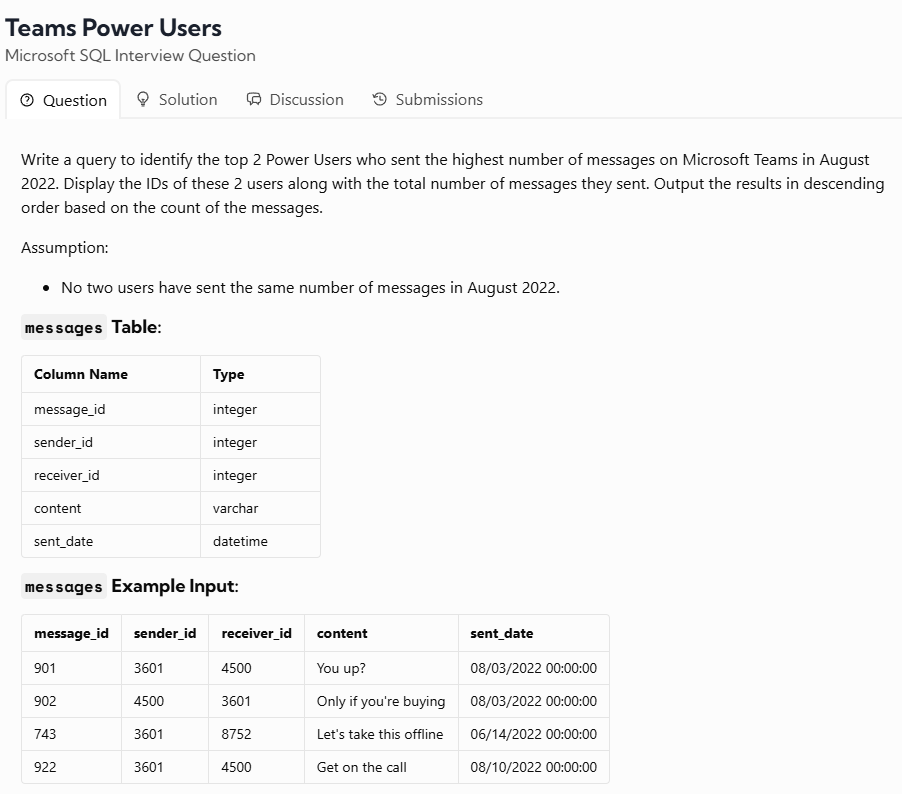

In [ ]:
select sender_id, count(message_id)
from messages
where EXTRACT(year from sent_date) = '2022'
and EXTRACT(month from sent_date) = '08'
GROUP BY sender_id
ORDER BY count(message_id) DESC
limit 2;

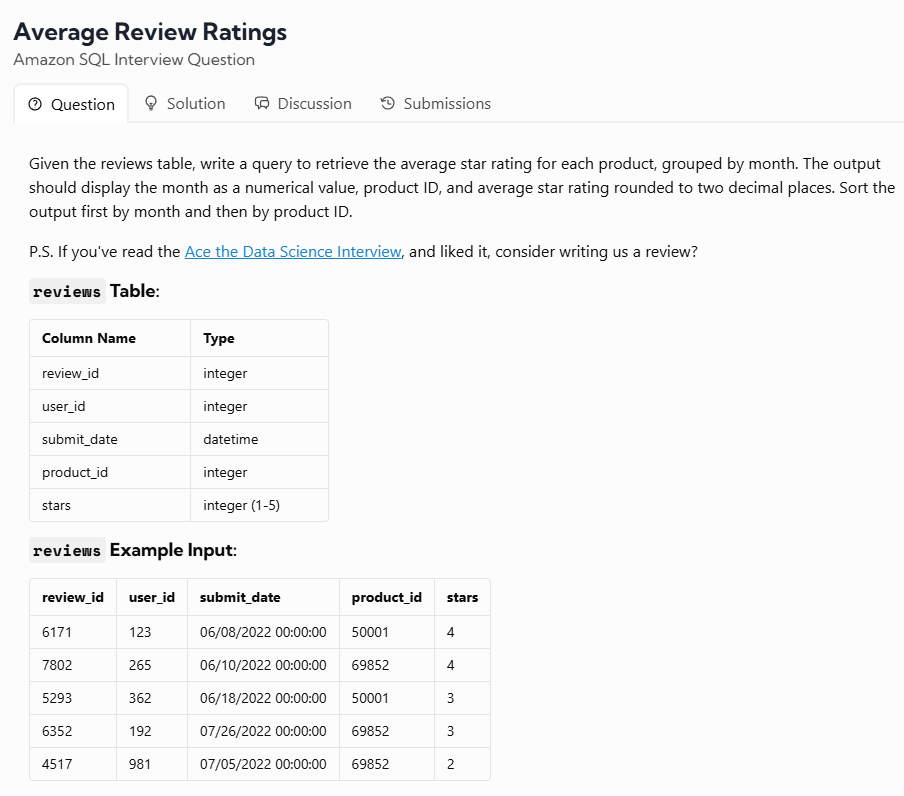

In [ ]:
SELECT EXTRACT(month from submit_date) as mth, product_id as product, ROUND(avg(stars), 2) as avg_stars
FROM reviews
GROUP BY EXTRACT(month from submit_date), product_id
ORDER BY mth, product;

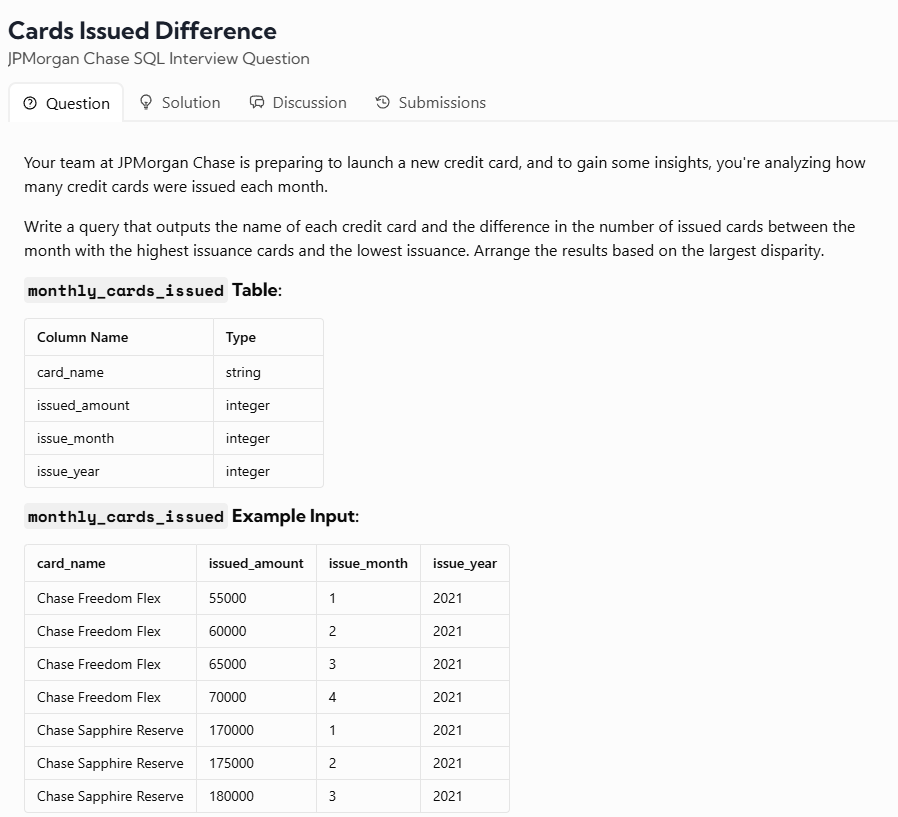

In [ ]:
SELECT card_name, max(issued_amount) - min(issued_amount) as difference
FROM monthly_cards_issued
GROUP BY card_name
ORDER BY difference DESC;

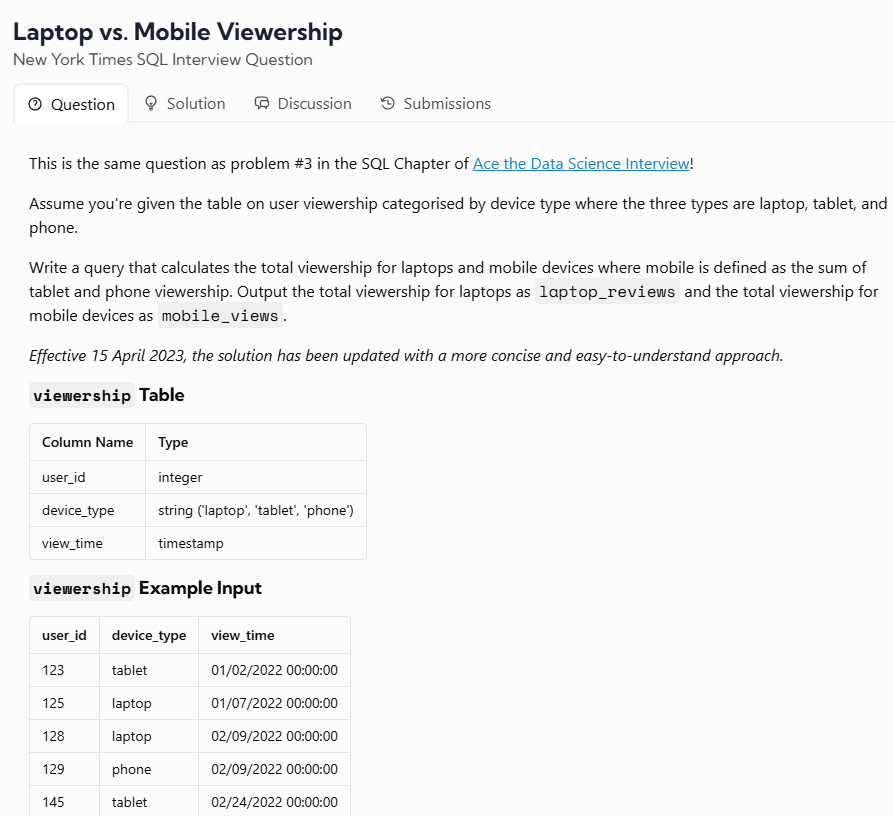

SELECT 
SUM(case when device_type = 'laptop' then 1 else 0 end) as laptop_views,
sum(case when device_type in ('tablet', 'phone') then 1 else 0 end) as mobile_view
FROM viewership;

# common mistakes - closing paranthesis in case needs to be after end, comma after every case logic, case logic is written in the select line.

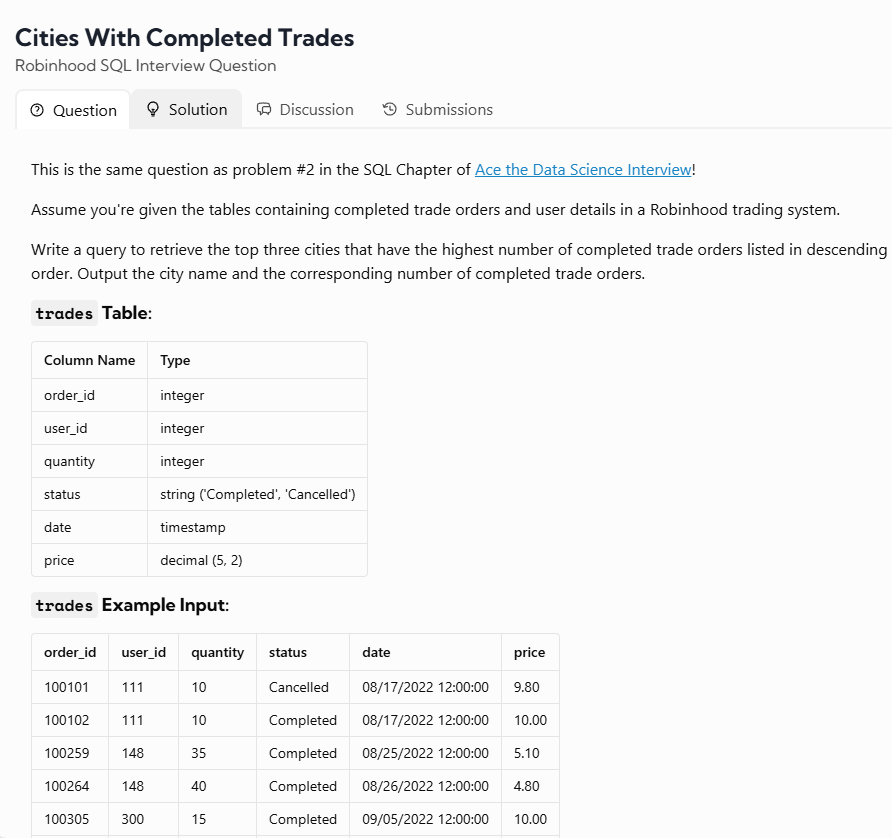

SELECT u.city, count(*) as total_orders
FROM trades t
LEFT JOIN users u
on t.user_id = u.user_id
where t.status = 'Completed'
GROUP BY u.city
ORDER BY total_orders DESC
limit 3;

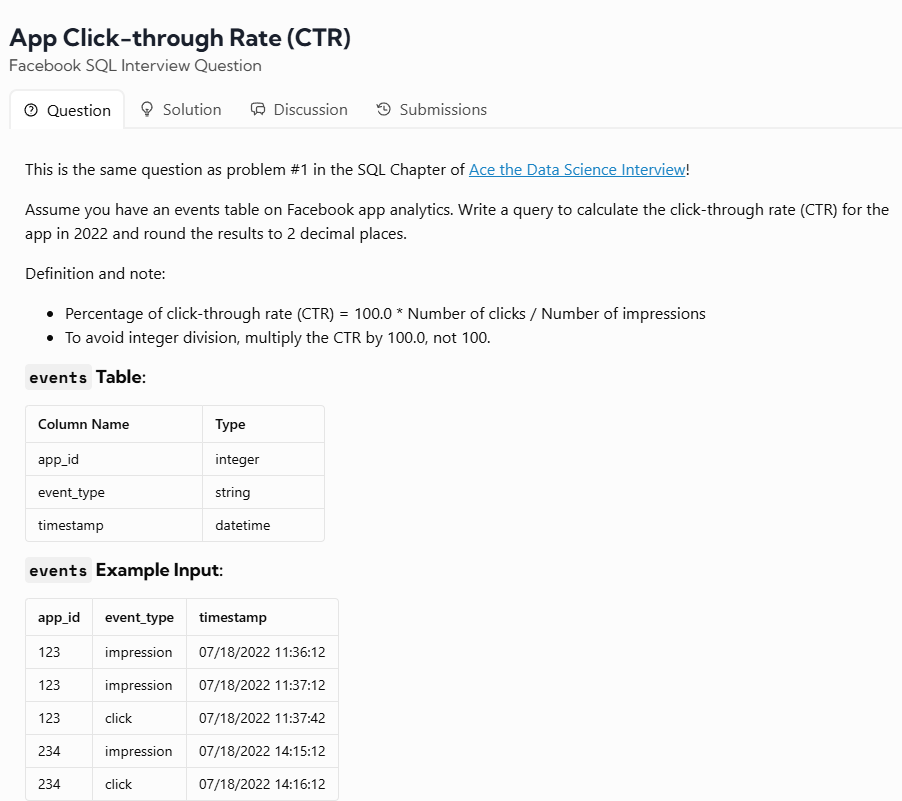

with cte as (SELECT app_id, 
sum(case when event_type='impression' then 1 else 0 end) as impressions,
sum(case when event_type='click' then 1 else 0 end) as clicks
FROM events
where EXTRACT(year from timestamp)='2022'
group by app_id)

select app_id, round(100.0*clicks/impressions, 2)
from cte;

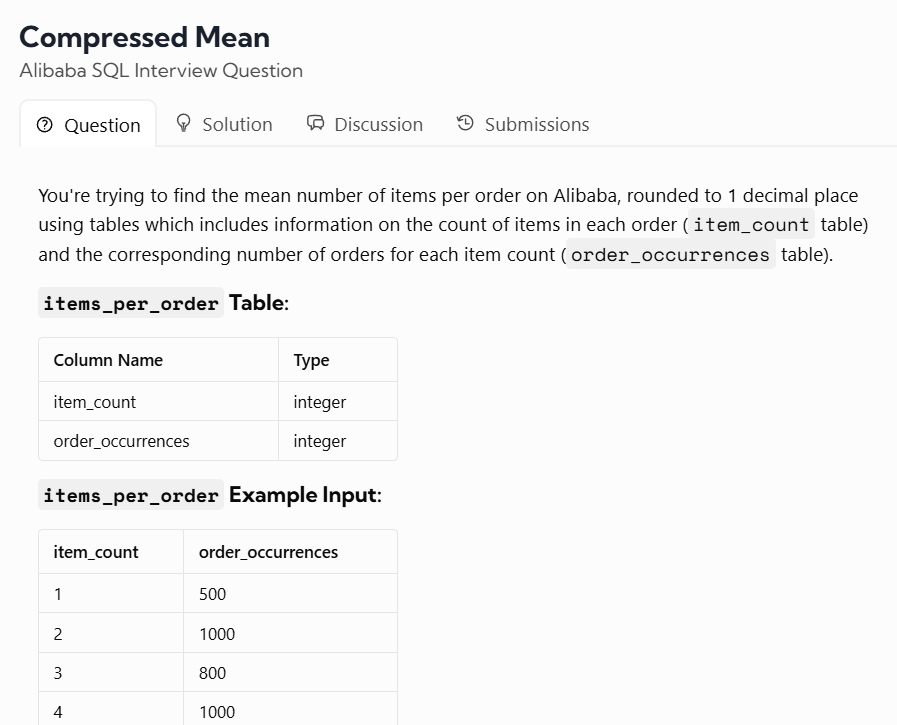

In PostgreSQL:
- The ROUND function with a precision argument (e.g., ROUND(value, 1)) only works with NUMERIC or DECIMAL data types.
- If the input is of type DOUBLE PRECISION (a floating-point number), the system doesn't know how to apply the precision parameter, which causes the error.
- To fix this, you need to convert (or cast) the result of your division to a compatible type like NUMERIC before using ROUND. 

In [ ]:
with cte as (SELECT
sum(item_count * order_occurrences) as total_items, 
sum(order_occurrences) as total_orders
FROM items_per_order)

SELECT ROUND(CAST(1.0 * total_items / total_orders AS NUMERIC), 1) AS mean
FROM cte;

### Medium

Over() clause in SQL is used to create windows. i.e to create partition over data. If no argument inside over then for each of the row
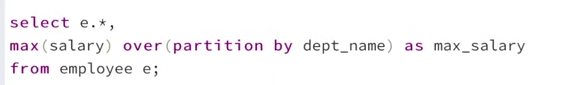

row_number assigns unique value (number) to each of the row in the table
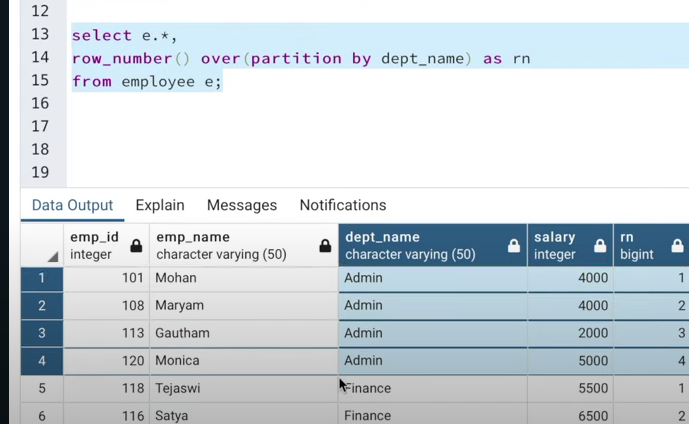
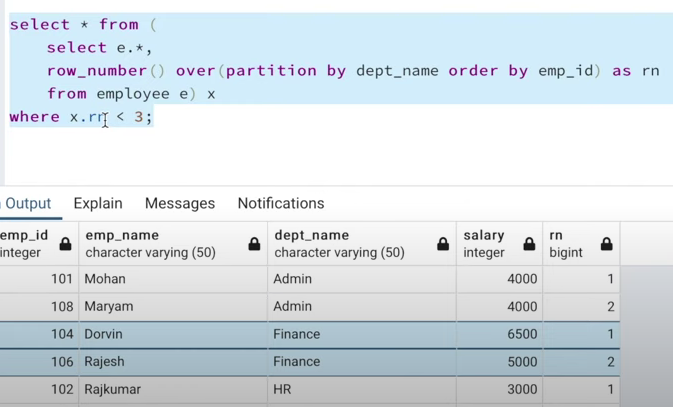

rank()
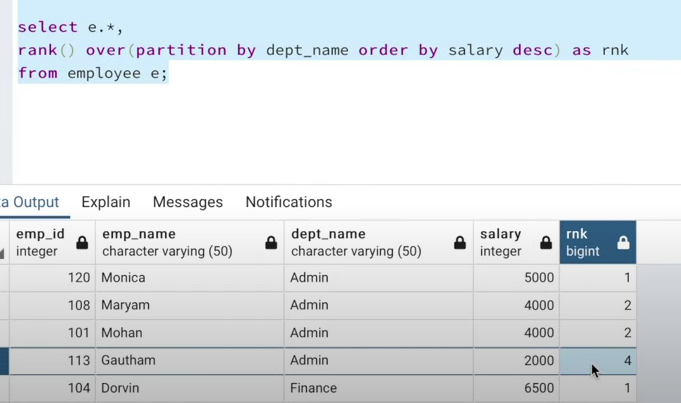
dense_rank()
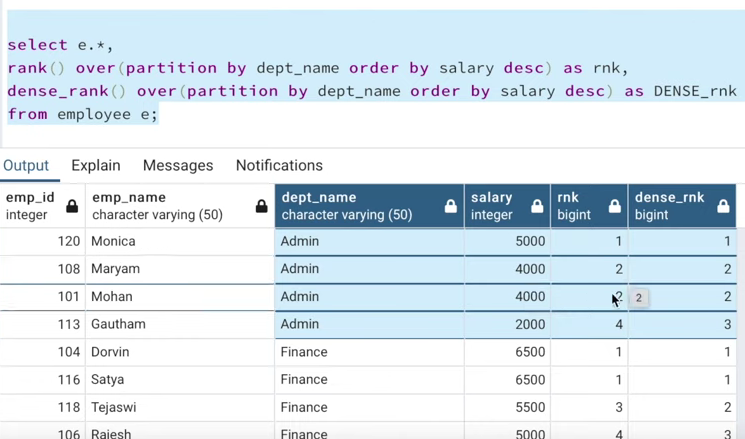

- row_number - serial_number
- rank - skip the next number for the same rank
- dense_rank - do not skip the next number in case of same rank